# We use 3ds Max to prepare the dataset

In [6]:
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np

In [17]:
img = PIL.Image.open('cards_3d/test0000.png')
mask = PIL.Image.open('cards_3d/test_ObjectID0000.png')

In [18]:
image = np.asarray(img)
mask = np.asarray(mask)

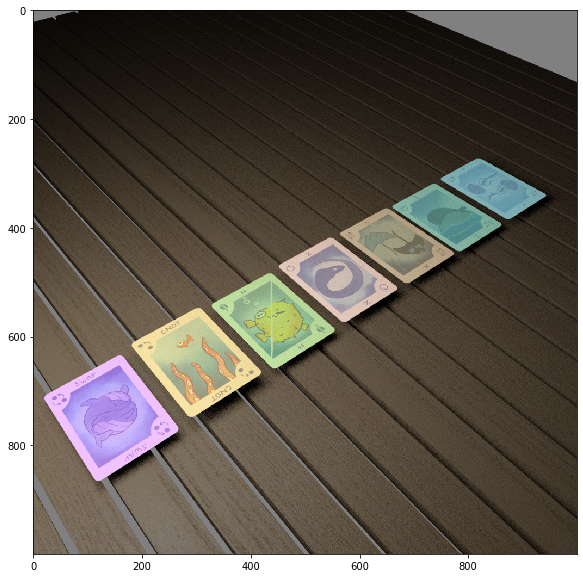

In [30]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.imshow(mask, alpha=.5)

In [268]:
colors = {"swap": [226, 133, 253],
"cnot": [244, 202, 76],
 "h": [155, 218,  92],
 "z": [253, 197, 169],
 "x": [207, 169, 109],
 "i": [125, 217, 182],
 "y": [140, 236, 244]}#[119,218,224]}

In [32]:
mask * (np.abs(mask[:,:,0] - 245) == 2)

ValueError: operands could not be broadcast together with shapes (1000,1000,3) (1000,1000) 

In [60]:
idx = (np.abs(mask[:,:,0] - 240) <= 2)

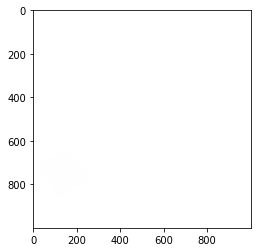

In [98]:
plt.imshow(image*mask[:,:,np.newaxis])

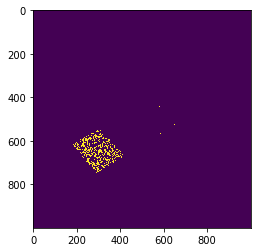

In [50]:
plt.imshow(idx)

In [63]:
np.savetxt('test.txt', mask[:,:,0])

In [64]:
np.unique(mask[:,:,0])

array([  0,  17,  18,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
        70,  71,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 200, 20

In [65]:
import cv2

In [285]:
from matplotlib import patches

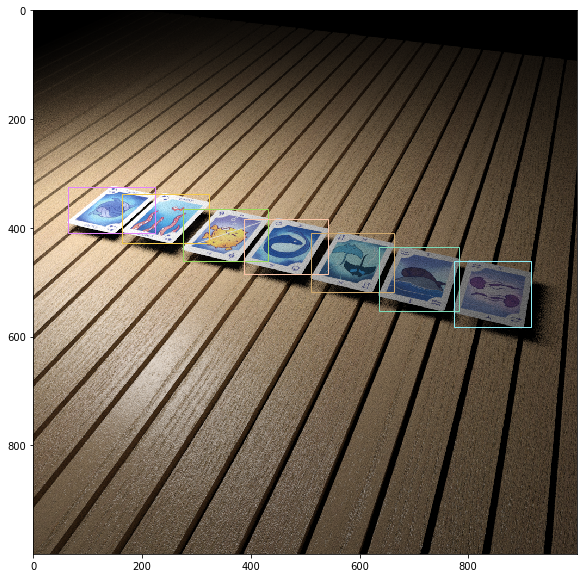

In [299]:
img = cv2.imread('cards_3d/test0020.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask_0 = cv2.imread('cards_3d/test_ObjectID0020.png')
mask_0 = cv2.cvtColor(mask_0, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(img)

for k, v in colors.items():
    c = np.asarray(v)

    lower_range = c - 5
    upper_range = c + 5

    mask = cv2.inRange(mask_0, lower_range, upper_range)

    ymin, ymax, xmin, xmax = bounding_box(mask)
    
    #res = cv2.bitwise_and(img, img, mask=mask)
    ax = plt.gca()

    # Create a Rectangle patch
    rect = patches.Rectangle((xmin, ymax), xmax - xmin, ymin - ymax, linewidth=1, edgecolor=(c/255), facecolor='none')
    ax.add_patch(rect)

In [265]:
np.floor(np.mean(mask_0[mask > 0],axis=0))
#np.std(mask_0[mask > 0],axis=0)

array([155., 218.,  92.])

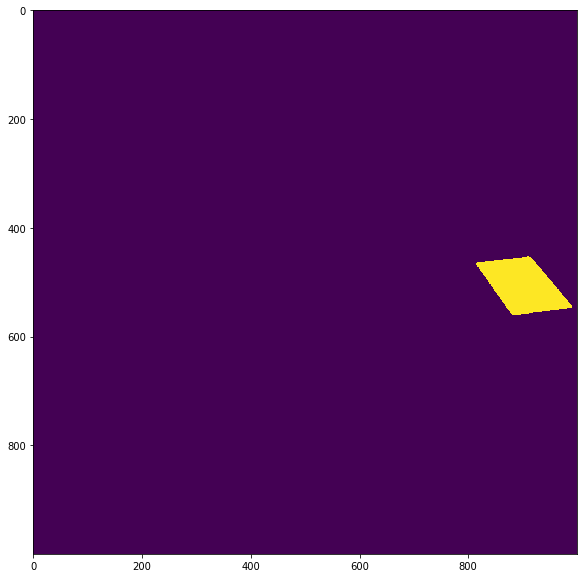

In [280]:
lower_range = c - 22 #np.array([225,130,0])
upper_range = c + 22 #np.array([234,134,255])
mask = cv2.inRange(mask_0, lower_range, upper_range)
plt.figure(figsize=[10, 10])
plt.imshow(mask)

In [17]:
def bounding_box(img):
    img = (img > 0)
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.argmax(rows), img.shape[0] - 1 - np.argmax(np.flipud(rows))
    cmin, cmax = np.argmax(cols), img.shape[1] - 1 - np.argmax(np.flipud(cols))
    return rmin, rmax, cmin, cmax

swap 0 999 0 999
cnot 0 999 0 999
h 0 999 0 999
z 291 291 2 2
x 0 999 0 999
i 364 404 24 106
y 0 999 0 999


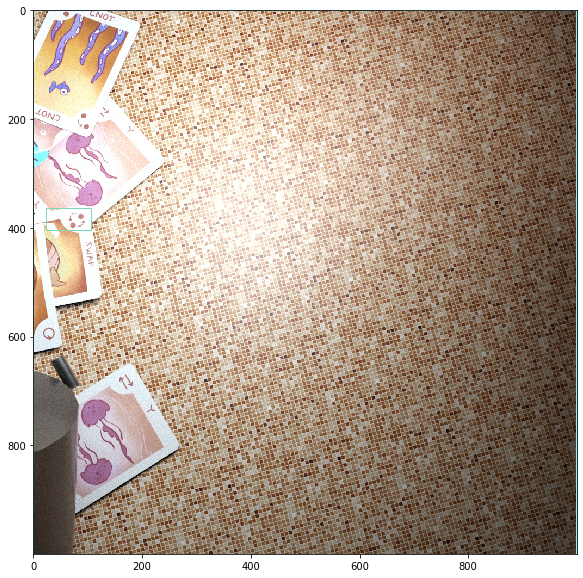

In [319]:
img = cv2.imread('qcards_augmentation/qcards_augmentation0115.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask_0 = cv2.imread('qcards_augmentation/qcards_augmentation_ObjectID0115.jpeg')
mask_0 = cv2.cvtColor(mask_0, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(img)

for k, v in colors.items():
    c = np.asarray(v)

    lower_range = c - 10
    upper_range = c + 10

    mask = cv2.inRange(mask_0, lower_range, upper_range)

    ymin, ymax, xmin, xmax = bounding_box(mask)
    print(k,  ymin, ymax, xmin, xmax)
    #res = cv2.bitwise_and(img, img, mask=mask)
    ax = plt.gca()

    # Create a Rectangle patch
    rect = patches.Rectangle((xmin, ymax), xmax - xmin, ymin - ymax, linewidth=1, edgecolor=(c/255), facecolor='none')
    ax.add_patch(rect)

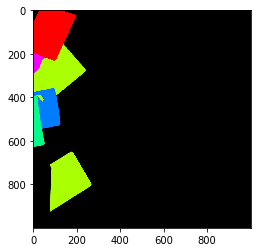

In [310]:
plt.imshow(mask_0)

In [317]:
c = np.asarray(colors['swap'])

lower_range = c - 50
upper_range = c + 50

mask = cv2.inRange(mask_0, lower_range, upper_range)

In [322]:
mask_0 = cv2.imread('qcards_augmentation/qcards_augmentation_ObjectID0115.jpeg')
mask_0 = cv2.cvtColor(mask_0, cv2.COLOR_BGR2RGB)

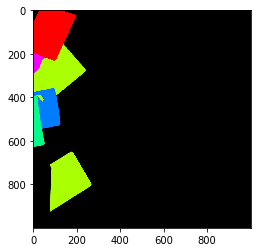

In [323]:
plt.imshow(mask_0)

## New version

In [11]:
from glob import glob
import re
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from matplotlib import patches

def bounding_box(img):
    img = (img > 0)
    rows = np.any(img, axis=1)
    cols = np.any(img, axis=0)
    rmin, rmax = np.argmax(rows), img.shape[0] - 1 - np.argmax(np.flipud(rows))
    cmin, cmax = np.argmax(cols), img.shape[1] - 1 - np.argmax(np.flipud(cols))
    return rmin, rmax, cmin, cmax

In [51]:
n = 12
image_path = glob('images/*{:>04d}.jpg'.format(n))

mask_paths = glob('annotations/masks/*{:>04d}.png'.format(n))
mask_paths = {re.search('_([a-zA-Z]*)\d', p).group(1): p for p in mask_paths}
        
print(mask_paths)

{'id': 'annotations/masks/qcards_augmentation_ObjectID_id0012.png', 'Z': 'annotations/masks/qcards_augmentation_ObjectID_Z0012.png', 'SWAP': 'annotations/masks/qcards_augmentation_ObjectID_SWAP0012.png', 'X': 'annotations/masks/qcards_augmentation_ObjectID_X0012.png', 'CN': 'annotations/masks/qcards_augmentation_ObjectID_CN0012.png', 'Y': 'annotations/masks/qcards_augmentation_ObjectID_Y0012.png', 'H': 'annotations/masks/qcards_augmentation_ObjectID_H0012.png'}


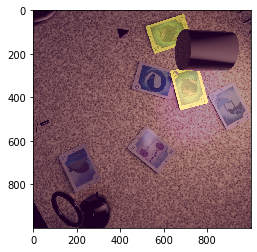

In [52]:
img = cv2.imread(image_path[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

mp = mask_paths['SWAP']
mask = cv2.imread(mp, cv2.IMREAD_UNCHANGED)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(mask, alpha=.4)

In [7]:
ret, labels = cv2.connectedComponents(mask)

In [26]:
for l in range(1, ret):
    cardmask = np.zeros(labels.shape, dtype=np.uint8)
    cardmask[labels == l] = 1

    bbox = bounding_box(cardmask)

In [43]:
def plot_bbox(bbox, label=None):
    ax = plt.gca()
    ymin, ymax, xmin, xmax = bbox
    # Create a Rectangle patch
    rect = patches.Rectangle((xmin, ymax), xmax - xmin, ymin - ymax, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    if label:
        ax.annotate(label, ((xmin + xmax) /2, (ymin + ymax) /2), color='r',  ha='center')

In [103]:
def process_image(image_path, mask_paths):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    classes = []
    masks = []
    bboxes = []

    for label, mp in mask_paths.items():
        mask = cv2.imread(mp, cv2.IMREAD_UNCHANGED)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

        ret, labels = cv2.connectedComponents(mask)

        # The first component is the background, so we skip it
        for l in range(1, ret):
            cardmask = np.zeros(labels.shape, dtype=np.uint8)
            cardmask[labels == l] = 1

            if np.sum(cardmask) > 2000:
                bbox = bounding_box(cardmask)
                classes.append(label)
                masks.append(cardmask)
                bboxes.append(bbox)
            else:
                print("Object ", label, "discarded, item too small:", np.sum(cardmask))
        
    return classes, masks, bboxes

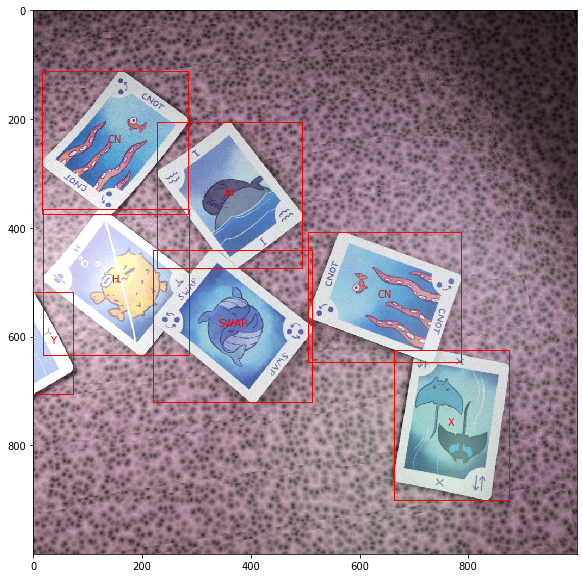

In [115]:
n = 23
image_path = glob('images/*{:>04d}.jpg'.format(n))[0]

mask_paths = glob('annotations/masks/*{:>04d}.png'.format(n))
mask_paths = {re.search('_([a-zA-Z]*)\d', p).group(1): p for p in mask_paths}

classes, masks, bboxes = process_image(image_path, mask_paths)

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10,10])
plt.imshow(img)

for i in range(len(classes)):
    plot_bbox(bboxes[i], classes[i])

In [116]:
image_paths = glob('images/*.jpg')

In [117]:
list(image_paths)

['images/qcards_augmentation0002.jpg',
 'images/qcards_augmentation0016.jpg',
 'images/qcards_augmentation0017.jpg',
 'images/qcards_augmentation0003.jpg',
 'images/qcards_augmentation0015.jpg',
 'images/qcards_augmentation0001.jpg',
 'images/qcards_augmentation0000.jpg',
 'images/qcards_augmentation0014.jpg',
 'images/qcards_augmentation0010.jpg',
 'images/qcards_augmentation0004.jpg',
 'images/qcards_augmentation0005.jpg',
 'images/qcards_augmentation0011.jpg',
 'images/qcards_augmentation0007.jpg',
 'images/qcards_augmentation0013.jpg',
 'images/qcards_augmentation0012.jpg',
 'images/qcards_augmentation0006.jpg',
 'images/qcards_augmentation0023.jpg',
 'images/qcards_augmentation0022.jpg',
 'images/qcards_augmentation0020.jpg',
 'images/qcards_augmentation0008.jpg',
 'images/qcards_augmentation0009.jpg',
 'images/qcards_augmentation0021.jpg',
 'images/qcards_augmentation0019.jpg',
 'images/qcards_augmentation0018.jpg']

In [121]:
img.shape

(1000, 1000, 3)

In [122]:
import csv

In [ ]:
csv.